<a href="https://colab.research.google.com/github/TopData530/Mushroom-Predictions/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projects to use for machine learning predictions
##Eric Saechao

In [211]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [212]:
df = pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [214]:
pd.set_option('display.max_column', None)

##Attribute Information: (classes: edible=e, poisonous=p)

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,* white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y
 
* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [215]:
#Make copy of dataframe
ml_df = df.copy()

In [216]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [217]:
ml_df.duplicated().sum()

0

No duplicates in dataset

In [218]:
#Check for missing values
ml_df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

##Identify and correct inconsistencies in data for categorical values

In [219]:
#Check objects of dataset
dtypes = ml_df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [220]:
#Check for inconsistencies in objects
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= class
e    4208
p    3916
Name: class, dtype: int64



- Column= cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64



- Column= cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64



- Column= cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64



- Column= bruises
f    4748
t    3376
Name: bruises, dtype: int64



- Column= odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64



- Column= gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64



- Column= gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64



- Column= gill-size
b    5612
n    2512
Name: gill-size, dtype: int64



- Column= gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r 

No inconsistencies in dataset except all the data's row has letters instead of words so we dont know what it means. No outliers found in data because of being all categorical.

##Replace all columns rows with words instead of letters

In [221]:
#Change all columns values
ml_df['class'].replace({'p':'Poisonous', 'e':'Edible'}, inplace=True)
ml_df['cap-color'].replace({'n':'Brown', 'b':'Buff', 'c':'Cinnamon', 'g':'Gray', 
                            'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow'}, inplace=True)
ml_df['cap-shape'].replace({'b':'Bell', 'c':'Conical', 'x':'Convex', 'f':'flat',
                            'k':'Knobbed', 's':'Sunken'}, inplace=True)
ml_df['cap-surface'].replace({'f':'Fibrous', 'g':'Grooves', 'y':'Scaly', 's':'smooth'}, inplace=True)
ml_df['gill-attachment'].replace({'a':'Attached', 'd':'Descending', 'f':'Free', 'n':'Notched'}, inplace=True)
ml_df['gill-spacing'].replace({'c':'Close', 'w':'Crowded', 'd':'Distance'}, inplace=True)
ml_df['gill-size'].replace({'b':'Broad', 'n':'Narrow'}, inplace=True)
ml_df['gill-color'].replace({'k':'Black', 'n':'Brown', 'b':'Buff', 'h':'Chocolate',
                             'g':'Gray', 'r':'Green', 'o':'Orange', 'p':'Pink',
                             'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow'}, inplace=True)
ml_df['veil-color'].replace({'n':'Brown', 'o':'Orange', 'w':'White', 'y':'Yellow'}, inplace=True)
ml_df['ring-type'].replace({'c':'Cobwebby', 'e':'Evanescent','f':'Flaring', 'l':'Large',
                            'n':'None', 'p':'Pendant', 's':'Sheating', 'z':'Zone'}, inplace=True)
ml_df['spore-print-color'].replace({'k':'Black', 'n':'Brown', 'h':'Chocolate', 'r':'Green','b':'Buff',
                                     'o':'Orange', 'u':'Purple', 'w':'White', 'y':'Yellow'}, inplace=True)
ml_df['habitat'].replace({'g':'Grasses', 'l':'Leaves', 'm':'Meadows', 'p':'Paths',
                          'u':'Urban', 'w':'Waste', 'd':'Woods'}, inplace=True)
ml_df['population'].replace({'a':'Abundant', 'c':'Clustered', 'n':'Numerous', 's':'Scattered',
                          'v':'Several', 'y':'Solitary'}, inplace=True)
ml_df['bruises'].replace({'t':'Bruises','f':'No' }, inplace=True)
ml_df['odor'].replace({'a':'Almond', 'l':'Anise', 'c':'Creosote', 'y':'Fishy',
                          'm':'Musty', 'n':'None', 'p':'Pungent', 's':'Spicy'}, inplace=True)
ml_df['stalk-shape'].replace({'e':'Enlarging', 't':'Tapering'}, inplace=True)
ml_df['stalk-root'].replace({'b':'Bulbous', 'c':'Club', 'u':'Cup', 'e':'Rhizomorphs',
                          'r':'Rooted', '?':'Missing'}, inplace=True)
ml_df['stalk-surface-above-ring'].replace({'f':'Fibrous', 'y':'Scaly', 'k':'Silky', 's':'Smooth'}, inplace=True)
ml_df['stalk-surface-below-ring'].replace({'f':'Fibrous', 'y':'Scaly', 'k':'Silky', 's':'Smooth'}, inplace=True)
ml_df['stalk-color-above-ring'].replace({'n':'Brown', 'b':'Buff', 'c':'Cinnamon', 'g':'Gray',
                          'o':'Orange', 'p':'Pink', 'e':'Red', 'w':'White', 'y':'Yellow'}, inplace=True)
ml_df['stalk-color-below-ring'].replace({'n':'Brown', 'b':'Buff', 'c':'Cinnamon', 'g':'Gray',
                          'o':'Orange', 'p':'Pink', 'e':'Red', 'w':'White', 'y':'Yellow'}, inplace=True)
ml_df['veil-type'].replace({'p':'Partial', 'u':'Universal'}, inplace=True)
ml_df['ring-number'].replace({'n':'None', 'o':'One', 't':'Two'}, inplace=True)


Changed all rows letters to names for clearer representation of columns.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



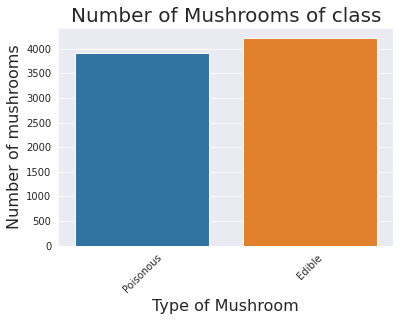

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



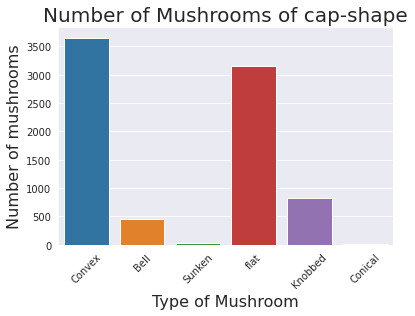

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



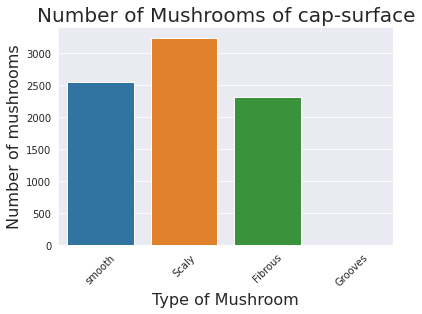

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



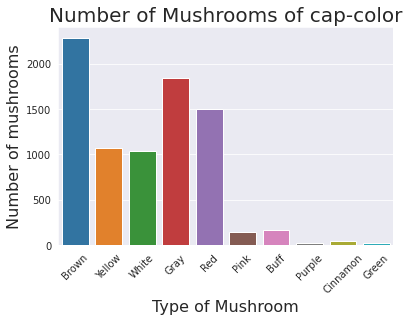

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



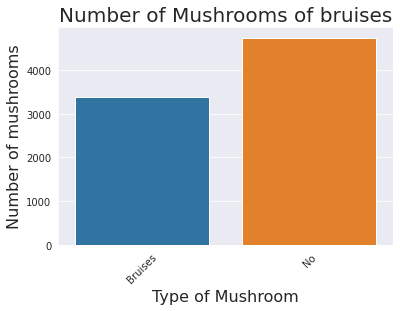

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



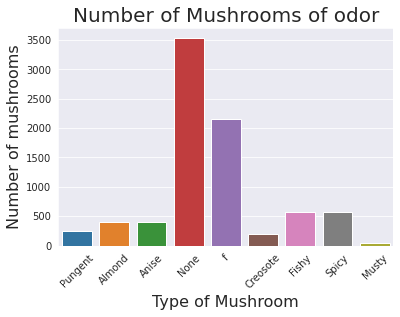

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



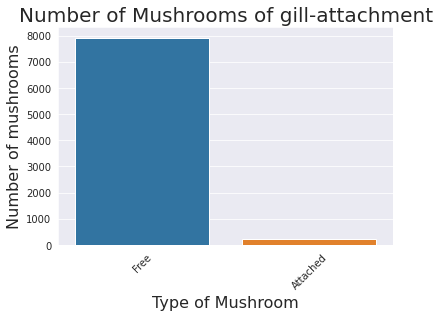

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



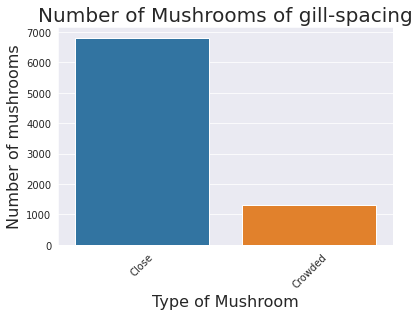

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



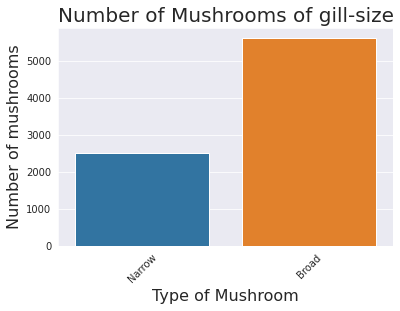

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



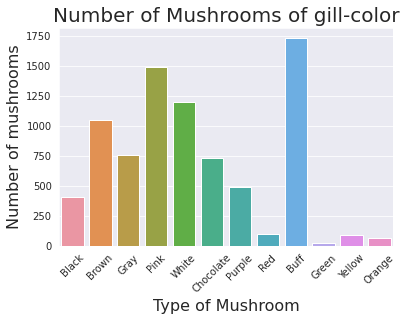

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



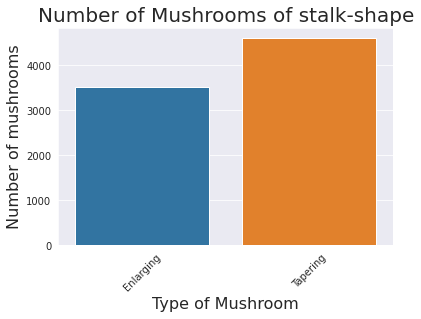

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



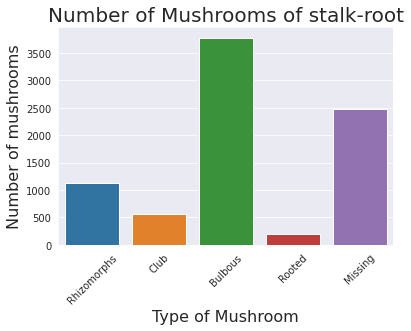

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



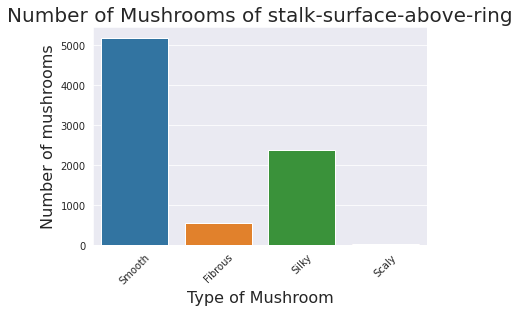

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



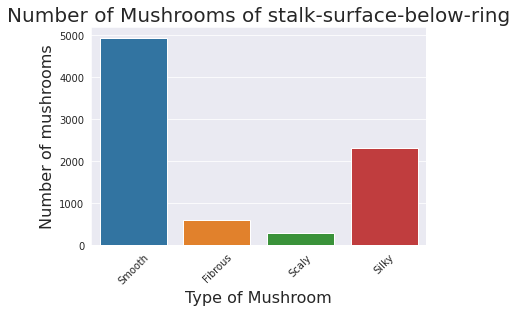

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



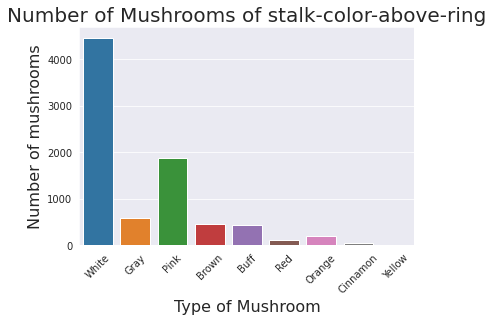

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



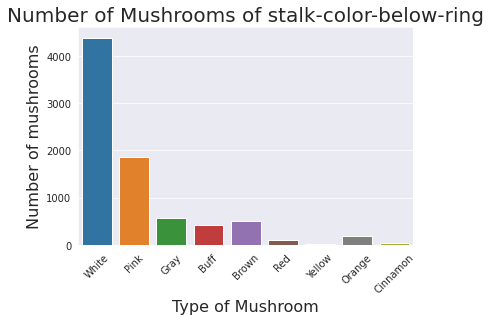

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



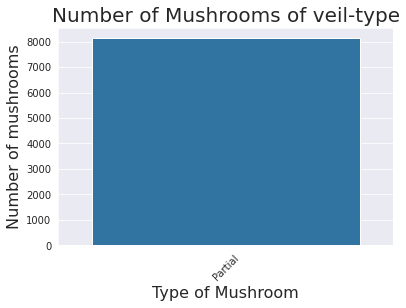

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



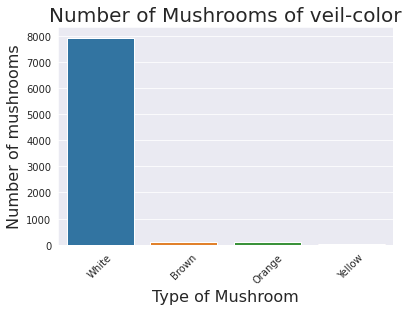

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



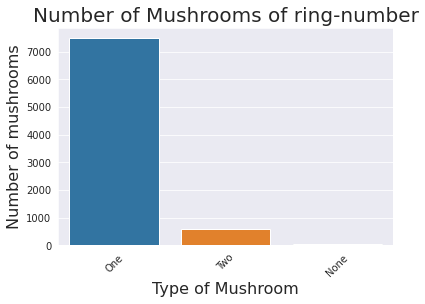

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



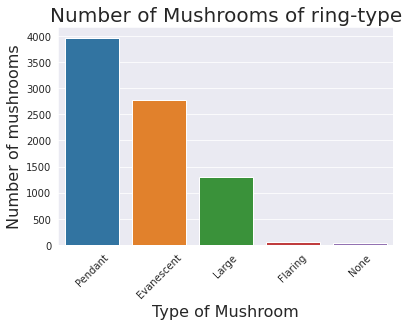

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



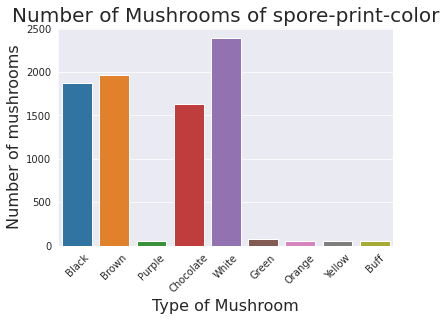

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



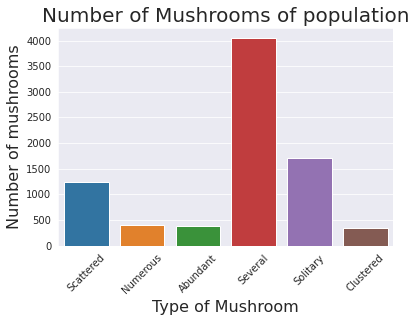

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



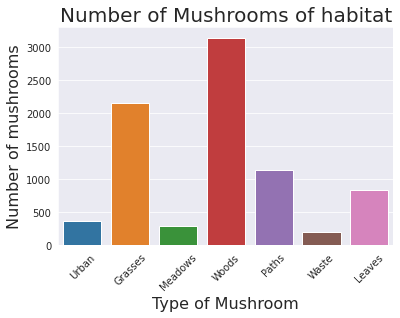

In [222]:
from matplotlib import legend
from seaborn.rcmod import set_style
# Use barplot to produce target visualization
for col in ml_df.columns: 
  sns.countplot(ml_df[col])
  set_style('darkgrid')
  plt.xticks(rotation=45)
  plt.xlabel('Type of Mushroom', fontsize=16)
  plt.ylabel('Number of mushrooms', fontsize=16)
  plt.title(f'Number of Mushrooms of {col}', fontsize=20)
  plt.show();

In [223]:
#Describe data
ml_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,Edible,Convex,Scaly,Brown,No,None,Free,Close,Broad,Buff,Tapering,Bulbous,Smooth,Smooth,White,White,Partial,White,One,Pendant,White,Several,Woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#There are no numerical categories in data so there are no outliers

In [224]:
## dataframe creation - for plotting
# create new pandas dataframe which contains all counts sorted by population
population_df = (
    ml_df.groupby(["population"])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["population"]))

In [225]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
## Creating a pie chart
# create labels using all unique values in the column named "population"
labels = population_df["population"].unique()
# group by count of the "population" column.
values = population_df["Counts"]
# Custom define a list of colors to be used for the pie chart.
# Note that the same number of colors are specified as there are unique populations. It is not mandatory, but
# will avoid a single color to be used multiple times.
earth_colors = [
    "rgb(210,180,140)",
    "rgb(218,165,32)",
    "rgb(139,69,19)",
    "rgb(175, 51, 21)",
    "rgb(35, 36, 21)",
    "rgb(188,143,143)",
]
# defining the actual figure using the dimension: population
# Note that a pull keyword was specified to explode pie pieces out of the center
fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,
            # pull is given as a fraction of the pie radius
            pull=[0, 0, 0.07, 0.08, 0.02, 0.2],
            # iterate through earth_colors list to color individual pie pieces
            marker_colors=earth_colors,
        )
    ]
)
# Update layout to show a title
fig.update_layout(title_text="Mushroom Polulation")
# display the figure
fig.show()

In [226]:
## dataframe creation - for plotting
# create new pandas dataframe which contains all counts filtered by 'is-edible' == "edible" and sorted by population
edible_population_df = (
    ml_df.loc[ml_df['class'] == "Edible"]
    .groupby(["population"])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["population"])
)
# create new pandas dataframe which contains all counts filtered by 'is-edible' == "poisonous" and sorted by population
poisonous_population_df = (
    ml_df.loc[ml_df['class'] == "Poisonous"]
    .groupby(["population"])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["population"])
)
# get unique values from the just created pandas dataframes and store them in an array
labels_edible_population = edible_population_df["population"].unique()
labels_poisonous_population = poisonous_population_df["population"].unique()
# get all the counts from the created pandas dataframes and store them in an array
values_edible_population = edible_population_df["Counts"]
values_poisonous_population = poisonous_population_df["Counts"]

In [227]:
## Creating two pie charts
# Create subplots: use 'domain' type for Pie subplot

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])
# create an array of colors which will be custom colors to the plot
earth_colors = [
    "rgb(210,180,120)",
    "rgb(218,165,32)",
    "rgb(139,69,19)",
    "rgb(175, 51, 21)",
    "rgb(35, 36, 21)",
    "rgb(188,143,143)",]
# crate traces to specify the various properties of the first pie chart subplot
fig.add_trace(
    go.Pie(
        labels=labels_edible_population,
        values=values_edible_population,
        name="Edible Mushroom",
        marker_colors=earth_colors,),1,1,)
# crate traces to specify the various properties of the second pie chart subplot
fig.add_trace(
    go.Pie(
        labels=labels_poisonous_population,
        values=values_poisonous_population,
        name="Poisonous Mushroom",
        marker_colors=earth_colors,),1,2,)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=0.4, hoverinfo="label+percent+name")
# adapt layout of the chart for readability
fig.update_layout(
    title_text="Mushroom Population by Edibility",
    # Add annotations in the center of the donut pies.
    annotations=[
        dict(text="Edible", x=0.18, y=0.5, font_size=14, showarrow=False),
        dict(text="Poisonous", x=0.82, y=0.5, font_size=14, showarrow=False),],)
fig.show()

These pie charts show the populations of mushrooms based on wether they are edible or poisonous. The population that are edible are pretty close but you'll notice that there are numerous populations that are poisonous on the right.

Functions retrieved from Hardbach A. (n.d.)https://towardsdatascience.com/visualizing-multidimensional-categorical-data-using-plotly-bfb521bc806f 

In [228]:
ml_df['odor'].replace({'a':'Almond', 'l':'Anise', 'c':'Creosote', 'y':'Fishy',
                       'f':'foul', 'm':'Musty', 'n':'None', 'p':'Pungent', 's':'Spicy'}, inplace=True)

In [229]:
## dataframe creation - for plotting
# create new pandas dataframe which contains all counts sorted by population
odor_df = (
    ml_df.groupby(['odor'])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=['odor']))

In [230]:
## dataframe creation - for plotting
# create new pandas dataframe which contains all counts filtered by 'is-edible' == "edible" and sorted by population
edible_odor_df = (
    ml_df.loc[ml_df['class'] == "Edible"]
    .groupby(["odor"])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=['odor'])
)
# create new pandas dataframe which contains all counts filtered by 'is-edible' == "poisonous" and sorted by population
poisonous_odor_df = (
    ml_df.loc[ml_df['class'] == "Poisonous"]
    .groupby(["odor"])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=['odor'])
)
# get unique values from the just created pandas dataframes and store them in an array
labels_edible_population2 = edible_odor_df['odor'].unique()
labels_odor_population2 = poisonous_odor_df['odor'].unique()
# get all the counts from the created pandas dataframes and store them in an array
values_edible_odor = edible_odor_df["Counts"]
values_poisonous_odor = poisonous_odor_df["Counts"]

In [231]:
## Creating two pie charts
# Create subplots: use 'domain' type for Pie subplot

fig2 = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])
# create an array of colors which will be custom colors to the plot
valley_colors = [
    "rgb(75,137,120)",
    "rgb(147,165,32)",
    "rgb(125,55,16)",
    "rgb(190, 51, 48)",
    "rgb(35, 36, 47)",
    "rgb(188,154,155)",]
# crate traces to specify the various properties of the first pie chart subplot
fig2.add_trace(
    go.Pie(
        labels=labels_edible_population2,
        values=values_edible_odor,
        name="Edible Mushroom",
        marker_colors=earth_colors,),1,1,)
# crate traces to specify the various properties of the second pie chart subplot
fig2.add_trace(
    go.Pie(
        labels=labels_odor_population2,
        values=values_poisonous_odor,
        name="Poisonous Mushroom",
        marker_colors=earth_colors,),1,2,)
# Use `hole` to create a donut-like pie chart
fig2.update_traces(hole=0.4, hoverinfo="label+percent+name")
# adapt layout of the chart for readability
fig2.update_layout(
    title_text="Mushroom Edibility by Odor",
    # Add annotations in the center of the donut pies.
    annotations=[
        dict(text="Edible", x=0.18, y=0.5, font_size=20, showarrow=False),
        dict(text="Poisonous", x=0.82, y=0.5, font_size=20, showarrow=False),],)
fig2.show()

These two pie chart displays the mushrooms that are poisnous or edible based on the smell. In the edible side, 81% of the mushrooms that are edible does not have a smell but when looking at the poisonous group 62% of the mushrooms that have an anise smell are poisonous to consume.

Functions retrieved from Hardbach A. (n.d.)https://towardsdatascience.com/visualizing-multidimensional-categorical-data-using-plotly-bfb521bc806f 

In [232]:
#Import libraries for new models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import set_config
set_config(display='diagram')

In [233]:
#Instatiate one hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [234]:
#Convert class features into numerical data for target 
ml_df['class'].replace({'Edible':0, 'Poisonous':1}, inplace=True)

In [235]:
#Instatiate target
X = ml_df.drop(columns= 'class')
y = ml_df['class']
#Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

We will be using class as our target for these model testing so we can predict the mushrooms that are poisonous or edible.

In [236]:
#Convert class data type to integer for models
ml_df['class'] = ml_df['class'].astype(int)

#Use RandomForestClassifer for first model testing

In [237]:
# Import random forest Regressor
from sklearn.ensemble import RandomForestClassifier
#Instantiate randomforest for model
rf = RandomForestClassifier(random_state = 42)


In [238]:
#Fit randomforest into data
rf_pipe = make_pipeline(ohe, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [239]:
#Create prediction for confusion matrix display
predictions = rf_pipe.predict(X_test)

In [240]:
#Print accuracy scores of randomforest
rf_train_score = rf_pipe.score(X_train, y_train)
rf_test_score = rf_pipe.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)


1.0
1.0


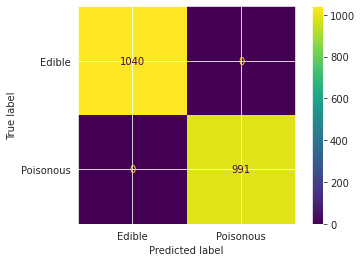

In [241]:
#Plot confusion matrix display
labels=['Edible','Poisonous']
ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=labels,);

Dataset is shows perfect accuracy and confusion matrix doesnt show any false positives or false negatives, which is great because we don't want to mistaken poisonous mushrooms as edible.

In [242]:
#Check parameters for hypertuning
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

we will try increaing number of estimators to see if we can increase the accuracy a bit.

##Create new model of random forest with tuned hyperparameters

In [243]:
# Let's try tuning our n_estimators, depth, and min_samples_leaf
rf_params = {'randomforestclassifier__max_depth': [1,2,3],
             'randomforestclassifier__min_samples_leaf': [1,3,5],
             'randomforestclassifier__min_samples_split': [2,3,4],
             'randomforestclassifier__n_estimators': [50, 100, 150]}

# Instantiate GridSearchCV and get best parameters
rf_grid_search = GridSearchCV(rf_pipe, rf_params)
rf_grid_search.fit(X_train, y_train)
rf_grid_search.best_params_

{'randomforestclassifier__max_depth': 3,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 150}

In [244]:
#Instantiate new randomforest parameter with hypertuning
rf2 = rf_grid_search.best_estimator_
rf2.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, n_estimators=150,
                                        random_state=42))])

Increased the number of estimators to 120 to see if it effected the accuracy.

In [245]:
#Create prediction for confusion matrix display
predictions2 = rf2.predict(X_test)

In [246]:
#Print new accuracy scores after hypertuning
%%time
rf_train_score2 = rf2.score(X_train, y_train)
rf_test_score2 = rf2.score(X_test, y_test)
print(rf_train_score2)
print(rf_test_score2)


0.9898243886427047
0.9911373707533235
CPU times: user 198 ms, sys: 1 ms, total: 199 ms
Wall time: 201 ms


Tunning the hyperparameters didn't do much since data already had really high accuracy. So the original model was better.

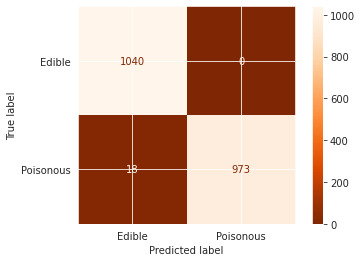

In [247]:
# Plot the confusion matrix
labels=['Edible','Poisonous']
ConfusionMatrixDisplay.from_predictions(y_test, predictions2,
                                        display_labels=labels,
                                        cmap='Oranges_r');

In [248]:
ml_df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

There we 18 false negatives in the tuned model which means these mushrooms are poisonous but counted as edible which can be dangerous.

#Use decision tree model for second model

In [249]:
#Instantiate decision tree and make pipeline
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)
dec_t = make_pipeline(ohe, dec_tree)
dec_t.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])

Will be using a max depth of 2 as a default for this model and we can go from there.

In [250]:
#Create prediction for confusion matrix display
prediction_dec = dec_t.predict(X_test)

In [251]:
# calculate classification accuracy
%%time
train_score = dec_t.score(X_train, y_train)
test_score = dec_t.score(X_test, y_test)
print(train_score)
print(test_score)

0.9556868537666174
0.9497784342688331
CPU times: user 61.9 ms, sys: 0 ns, total: 61.9 ms
Wall time: 63.7 ms


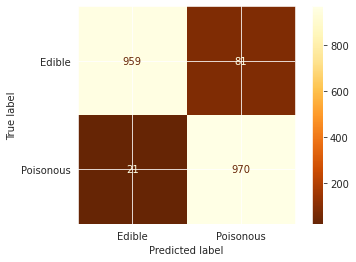

In [252]:
#Plot confusion matrix
labels=['Edible','Poisonous']
ConfusionMatrixDisplay.from_predictions(y_test, prediction_dec,
                                        display_labels=labels,
                                        cmap='YlOrBr_r');

Accuracy is dramtically reduced and there are 81 false negatives and 21 false positives which is a pretty poor model. Lets see if we can improve the performance with hypertuning.

##We will tune new decision tree models hyperparameters to see if we can do better than original model

In [253]:
# Looking at some hyperparameters that seem tunable
dec_t.get_params()

{'memory': None,
 'steps': [('onehotencoder',
   OneHotEncoder(handle_unknown='ignore', sparse=False)),
  ('decisiontreeclassifier',
   DecisionTreeClassifier(max_depth=2, random_state=42))],
 'verbose': False,
 'onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=2, random_state=42),
 'onehotencoder__categories': 'auto',
 'onehotencoder__drop': None,
 'onehotencoder__dtype': numpy.float64,
 'onehotencoder__handle_unknown': 'ignore',
 'onehotencoder__sparse': False,
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 2,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__

We will try tuning the hyperparameter to of max depth, sample leafs and samples split to see if this will work better.

In [254]:
#Tune new parameters
model = DecisionTreeClassifier()

param_grid = {'decisiontreeclassifier__max_depth': range(2,20),
              'decisiontreeclassifier__min_samples_leaf': [3,15,20],
              'decisiontreeclassifier__min_samples_split': [2, 10, 100]}        

We will adjust these samples and depth to new parameters for better performance.

In [255]:
##Use Gridsearch for new parameters
dt_grid_search = GridSearchCV(dec_t, param_grid)
dt_grid_search.fit(X_train, y_train)
prediction_dec2 = dt_grid_search.predict(X_test)

In [256]:
# calculate classification accuracy
%%time
train_score2 = dt_grid_search.score(X_train, y_train)
test_score2 = dt_grid_search.score(X_test, y_test)
print(train_score2)
print(test_score2)

1.0
1.0
CPU times: user 54.3 ms, sys: 0 ns, total: 54.3 ms
Wall time: 55.8 ms


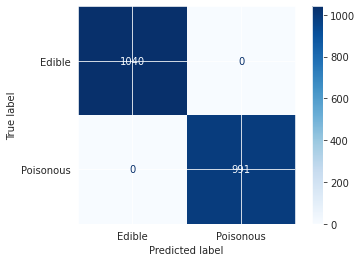

In [257]:
#Plot confusion matrix
labels=['Edible','Poisonous']
ConfusionMatrixDisplay.from_predictions(y_test, prediction_dec2,
                                        display_labels=labels,
                                        cmap='Blues');

Accuracy became perfect after hypertuning the parameters and there are no false positives or false negatives.

#Create new model for comparison with PCA, KNN will be a good choice

In [258]:
#Drop veil-type
ml_df = ml_df.drop(["veil-type"],axis=1)

Dropped veil-type because it does not provide any data but 0.

In [259]:
# Instantiate, fit & transform data using PCA
from sklearn.decomposition import PCA
# Instantiate & fit data using PCA with 95% variance 
pca = PCA(n_components=.95)

In [260]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# Create a modeling pipeline for knn and transformer
knn_pipe = make_pipeline(ohe, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [261]:
#Instantiate prediction with knn for confusion matrix display
prediction_knn = knn_pipe.predict(X_test)

In [262]:
%%time
print('Training accuracy:', knn_pipe.score(X_train, y_train))
print('Testing accuracy:', knn_pipe.score(X_test, y_test))


Training accuracy: 1.0
Testing accuracy: 1.0
CPU times: user 1.98 s, sys: 265 ms, total: 2.25 s
Wall time: 1.69 s


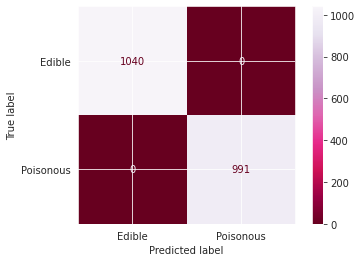

In [263]:
#Plot confusion matrix
labels=['Edible','Poisonous']
ConfusionMatrixDisplay.from_predictions(y_test, prediction_knn,
                                        display_labels=labels,
                                        cmap='PuRd_r');

KNN model shows perfect scores and there are no false negatives or false positives in model.

##Create new model with PCA on KNN model for comparison

In [264]:
# Create a PCA modeling pipeline for knn and transformer
knn_pipe2 = make_pipeline(ohe, pca, knn)
knn_pipe2.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [265]:
#Instantiate prediction with knn2 for confusion matrix display
prediction_knn2 = knn_pipe2.predict(X_test)

In [266]:
%%time
print('Training accuracy:', knn_pipe2.score(X_train, y_train))
print('Testing accuracy:', knn_pipe2.score(X_test, y_test))


Training accuracy: 1.0
Testing accuracy: 1.0
CPU times: user 1.7 s, sys: 280 ms, total: 1.98 s
Wall time: 1.53 s


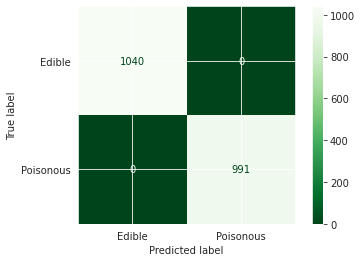

In [267]:
#Plot confusion matrix
labels=['Edible','Poisonous']
ConfusionMatrixDisplay.from_predictions(y_test, prediction_knn2,
                                        display_labels=labels,
                                        cmap='Greens_r');

Since both KNN models didn't have any errors the pca didn't effect the accuracy but it increased the speed by .16 sec which is pretty close to eachother.

##The production model I have chosen for this dataset is the decision tree model thats been hypertuned with grid search. There were many model with perfect accuracy's but this model was not only perfect scores but has the fastest time out of all the models at 55.8ms.